<a href="https://colab.research.google.com/github/nikhilsai-89/Fundamentals-Of-Machine-Learning/blob/main/EDA_on_Startup_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
print(df.isnull())

    R&D Spend  Administration  Marketing Spend  State  Profit
0       False           False            False  False   False
1       False           False            False  False   False
2       False           False            False  False   False
3       False           False            False  False   False
4       False           False            False  False   False
5       False           False            False  False   False
6       False           False            False  False   False
7       False           False            False  False   False
8       False           False            False  False   False
9       False           False            False  False   False
10      False           False            False  False   False
11      False           False            False  False   False
12      False           False            False  False   False
13      False           False            False  False   False
14      False           False            False  False   False
15      

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
print(df.nunique())


R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64


In [ ]:
c=df.corr()c=df.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

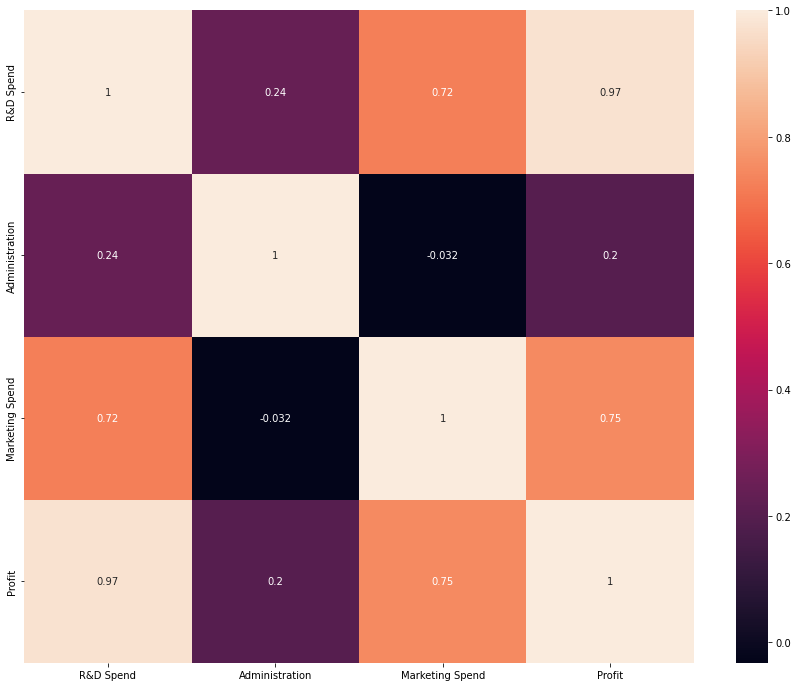

In [ ]:

plt.figure(figsize=(15,12))
sns.heatmap(c,annot=True)

Considering our output variable as profit, it has a positive correlation with R&D spend. Therefore if we change R&D spend, profit will be affected.

LINEAR REGRESSION

In [ ]:
df.shape

(50, 5)

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [ ]:
x_train.shape,x_test.shape

((35,), (15,))

In [ ]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [ ]:
x_train.shape,x_test.shape

((35, 1), (15, 1))

In [ ]:
#importing linear regression
from sklearn import linear_model

In [ ]:
#  fitting a regression model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')
     


Performance of the model on training data :

MAE = 32309.60932941985
MSE = 1615102011.6650577
RMSE = 40188.33178504748
R_2 = 0.12701797949507643


In [ ]:
#Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(x_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 29446.270102338898
MSE = 1599885410.0272639
RMSE = 39998.56759969366
R_2 = -0.6574876270036156


ValueError: ignored

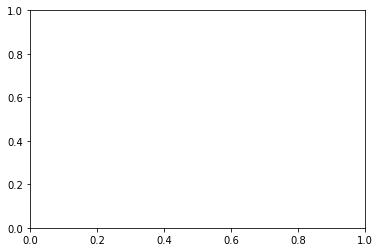

In [ ]:
plt.scatter(y_pred1,y_pred2)
plt.show()